### 부산지역 자치구별 주유소 정보 수집
- 1일 1회(혹은 1일 여러번인지는 사전 점검 필요)
- 대상 사이트 : http://www.opinet.co.kr/searRgSelect.do
- api 제공 (x), 사용자 조작을 통한 동적처리가 예상(when ajax 사용, post 사용)
> - selenium 모듈을 사용하여 사람이 직접 데이터를 수집하는 행위를 그대로 보고
> - 프로그램화 하여 자동화시킨다.
- pip install selenium
- 웹 자동화가 구동될 수 있는 웹드라이버 다운
- chrome(일반적사용), phantom(고스트 브라우저)-백그라운드=> UI가 없는 os에 적합.
- Downlaod http://chromedriver.chromium.org/downloads

In [1]:
from selenium import webdriver as wd

In [2]:
#기본 접속
driver = wd.Chrome('./data/chromedriver.exe')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [3]:
# 검색의 1차는 광역시도 선택
# 광역시도까지 선택하는 요소를 찾아서 값을 설정 한다. #SIDO_NM0
sido = driver.find_element_by_css_selector('#SIDO_NM0')

In [4]:
sido.send_keys('부산광역시')

In [5]:
# 부산광역시에 속한 시군구 획득
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')

In [6]:
# 자식들
options = sigungu.find_elements_by_tag_name('option')
gu_names = [option.get_attribute('value') for option in options]
gu_names

['',
 '강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [7]:
gu_names.pop(0)

''

In [8]:
gu_names

['강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [9]:
#금정구 선택
#sido.send_keys('부산광역시')

sigungu.send_keys('금정구')
# 폼전송 하기 때문에 페이지가 다 올라 올때까지 기다린다. 

In [10]:
#조회클릭 -> 생략가능
driver.find_element_by_css_selector('#searRgSelect').click()

In [11]:
#엑셀 다운 -> #glopopd_excel
#샘플
#driver.find_element_by_css_selector('#glopopd_excel').click()

In [11]:
from tqdm import tqdm_notebook
import time 

In [12]:
# 부산시에 있는 모든 군구에 주유 정보 엑셀 파일을 다운 받는다.
# 중간에 페이지 로드 대기 코드 
#sido.send_keys('부산광역시')
# 
# for name in tqdm_notebook(gu_names):
#     sido = driver.find_element_by_css_selector('#SIDO_NM0')
#     sido.send_keys('부산광역시')    
#     sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
#     sigungu.send_keys(name)
#     time.sleep(3)
#     driver.find_element_by_css_selector('#glopopd_excel').click()

In [ ]:
# 크롤링실습
# 인터파크 투어접속
# 파리로 검색
# 패키지 상품 이름, 가격, 기간, 평점, 썸네일 주소,
#, 세부 내용 주소 획득
# 세부 내용 들어가서 상품 특징 획득
# 해당 전체 목록을 다 수집해서 디비에 입력

In [ ]:
# 크롤링실습 2
# 국내 항공사 사이트에서 이벤트 정보 가져오기
# 진에어, 에어부산, 제주항공, 티웨이, 이스타, 에어서울, 아시아나, 대한항공
# 특가 혹은 얼리버드 이벤트 => html을 통으로 가져오거나, 텍스트 수집 등

In [3]:
############################################### 주유소 #########################################################
# 다운받은 엑셀 데이터 로드
# 브라우저에서 설정된 다운로드 위치를 고려하여
import pandas as pd
from glob import glob
# gleb : 파일 처리를 쉽게 해결

In [4]:
# 윈도우 기준 경로법(파일 불러오는경로, 파일 삭제 or 이동 여부, 파일 업로드 부분 고려)
download_files = glob('C:/Users/ChiHoon/Downloads/지역*.xls')
download_files

['C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (5).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (6).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (7).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (8).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소) (9).xls',
 'C:/Users/ChiHoon/Downloads\\지역_위치별(주유소).xls']

In [5]:
len(download_files)

16

In [9]:
pd.read_excel(download_files[0]).head()

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),알뜰주유소,051-582-5882,N,-,1613,1428,-
3,부산광역시,청룡명품주유소,부산광역시 금정구 중앙대로2130,현대오일뱅크,051-508-5150,N,-,1613,1423,-
4,부산광역시,은마석유노포주유소,부산 금정구 중앙대로 2191 (노포동),GS칼텍스,051-508-1645,Y,-,1618,1438,1050


In [16]:
# 부산시의 개별구의 개수와 동일
print(len(download_files) == len(gu_names))

True


In [18]:
# 파일을 읽어들여서 dataframe으로 포함.
tmp_raw_data = []
for fileName in tqdm_notebook(download_files):
    #xls를 읽어서 df로 로드
    tmp = pd.read_excel(fileName, header = 2)
    tmp_raw_data.append(tmp)
len(tmp_raw_data)

16

In [19]:
#merge는 합쳐질 키가 있어야함.
# 16개의 df를 병합해라.
tmp_raw_df = pd.concat(tmp_raw_data)
tmp_raw_df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),알뜰주유소,051-582-5882,N,-,1613,1428,-
1,부산광역시,청룡명품주유소,부산광역시 금정구 중앙대로2130,현대오일뱅크,051-508-5150,N,-,1613,1423,-


In [20]:
# 부산시 총 주유소 개수
len(tmp_raw_df.index)

423

In [21]:
tmp_raw_df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),알뜰주유소,051-582-5882,N,-,1613,1428,-
1,부산광역시,청룡명품주유소,부산광역시 금정구 중앙대로2130,현대오일뱅크,051-508-5150,N,-,1613,1423,-


In [22]:
# df 재구성(분석에 필요한 데이터만 가지고)
dic = {'store':tmp_raw_df['상호'],
       '주소':tmp_raw_df['주소'],
       '휘발유':tmp_raw_df['휘발유'],
       '셀프':tmp_raw_df['셀프여부'],
       '상표':tmp_raw_df['상표']}
gas_stations = pd.DataFrame(dic)

In [23]:
gas_stations.head(2)
print(gas_stations.shape)    

(423, 5)


In [24]:
# 실습 : 주소에서 자치구 정보를 추출해서 자치구 컬럼 생성, 상위 2개, 하위 2개 확인
 # series는 쪼갤 수 없다. series안 하나의 원소 원소로 접근한다.
    
gas_stations['자치구']=[addr.split()[1] for addr in gas_stations['주소']]

In [25]:
gas_stations.head(2),gas_stations.tail(3) # 합칠때 인덱스 조정은 안됬다.

(      store                   주소   휘발유 셀프      상표  자치구
 0  훼미리알뜰주유소   부산 금정구 두실로 2 (남산동)  1613  N   알뜰주유소  금정구
 1   청룡명품주유소  부산광역시 금정구  중앙대로2130  1613  N  현대오일뱅크  금정구,
             store                        주소   휘발유 셀프      상표  자치구
 43          명품주유소     부산 강서구 대저로 283 (대저1동)  1689  N  현대오일뱅크  강서구
 44          만선주유소     부산 강서구 가락대로 210번길 102  1698  N  현대오일뱅크  강서구
 45  (주)소모석유 과학주유소  부산 강서구 지사과학단지로 291 (지사동)  1698  N   GS칼텍스  강서구)

In [27]:
print(gas_stations['자치구'].unique(), len(gas_stations['자치구'].unique()))

['금정구' '서구' '수영구' '연제구' '영도구' '중구' '해운대구' '기장군' '남구' '동구' '동래구' '부산진구'
 '북구' '사상구' '사하구' '강서구'] 16


In [36]:
gas_stations

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1613,N,알뜰주유소,금정구
1,청룡명품주유소,부산광역시 금정구 중앙대로2130,1613,N,현대오일뱅크,금정구
2,은마석유노포주유소,부산 금정구 중앙대로 2191 (노포동),1618,Y,GS칼텍스,금정구
3,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1620,N,SK에너지,금정구
4,지현주유소,부산광역시 금정구 중앙대로 2044(남산동),1620,Y,S-OIL,금정구
5,㈜천일에너지 천일주유소서동점,부산 금정구 반송로 364 (서동),1628,N,현대오일뱅크,금정구
6,금샘로주유소,부산 금정구 금샘로 460 (남산동),1638,Y,SK에너지,금정구
7,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1648,Y,현대오일뱅크,금정구
8,동양주유소,부산광역시 금정구 반송로 391 (서동),1648,Y,현대오일뱅크,금정구
9,신화주유소,부산 금정구 금강로 721,1648,Y,현대오일뱅크,금정구


In [55]:
# 고급 휘발유에서 가격이 없는 경우 - 처리를 한 것을 비추어 볼때, 휘발유 칼럼에도 존재할 수 있을 것이다 예상하고 감사
####???????????????????????Query 사용법#####
gas_stations[gas_stations['휘발유'] == '-']


,store,주소,휘발유,셀프,상표,자치구
45,정우주유소,부산 기장군 일광면 기장대로 1291,-,N,GS칼텍스,기장군
33,인터지스(주)인터지스주유소,부산광역시 남구 신선로 250,-,N,현대오일뱅크,남구
34,SK네트웍스(주)직영명성주유소,부산 남구 우암로 232-1 (우암동),-,N,SK에너지,남구


In [68]:
gas_station2=gas_stations[gas_stations['휘발유'] != '-']
#gas_stations['휘발유'] != '-'


In [69]:
# 가격자ㅔ가 object -> float 교체
gas_station2['휘발유'] = gas_stations2['휘발유'].astype(float)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
gas_station2 # 인덱스 뒤죽박죽

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1613.0,N,알뜰주유소,금정구
1,청룡명품주유소,부산광역시 금정구 중앙대로2130,1613.0,N,현대오일뱅크,금정구
2,은마석유노포주유소,부산 금정구 중앙대로 2191 (노포동),1618.0,Y,GS칼텍스,금정구
3,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1620.0,N,SK에너지,금정구
4,지현주유소,부산광역시 금정구 중앙대로 2044(남산동),1620.0,Y,S-OIL,금정구
5,㈜천일에너지 천일주유소서동점,부산 금정구 반송로 364 (서동),1628.0,N,현대오일뱅크,금정구
6,금샘로주유소,부산 금정구 금샘로 460 (남산동),1638.0,Y,SK에너지,금정구
7,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1648.0,Y,현대오일뱅크,금정구
8,동양주유소,부산광역시 금정구 반송로 391 (서동),1648.0,Y,현대오일뱅크,금정구
9,신화주유소,부산 금정구 금강로 721,1648.0,Y,현대오일뱅크,금정구


In [71]:
# 데이터가 concatㅇ로 제작한 것이다보니 index가 중복적으로 나타나거나, 누락되거나 등등
# 인덱스를 0부터 차례대로 재설정
gas_station2.reset_index(inplace=True)

In [85]:
gas_station2.head()

,index,store,주소,휘발유,셀프,상표,자치구
0,0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1613.0,N,알뜰주유소,금정구
1,1,청룡명품주유소,부산광역시 금정구 중앙대로2130,1613.0,N,현대오일뱅크,금정구
2,2,은마석유노포주유소,부산 금정구 중앙대로 2191 (노포동),1618.0,Y,GS칼텍스,금정구
3,3,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1620.0,N,SK에너지,금정구
4,4,지현주유소,부산광역시 금정구 중앙대로 2044(남산동),1620.0,Y,S-OIL,금정구


In [89]:
gas_station2.columns


Index(['store', '주소', '휘발유', '셀프', '상표', '자치구'], dtype='object')

In [88]:
# index제거(reset 하는 과정에서 이상하게 됨)
try:
    #gas_stations2.drop('index',inplace=True)
    del gas_station2['index']
except Exception as e:
    print(e)

In [73]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

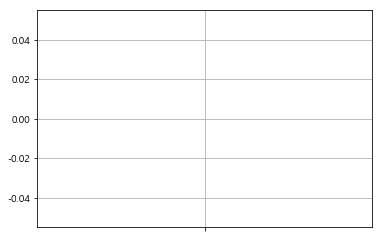

In [75]:
gas_stations.boxplot()

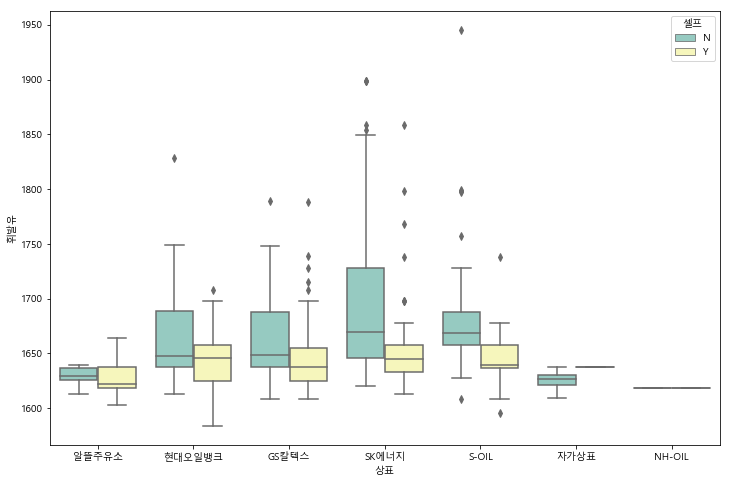

In [76]:
# 브랜드별 셀프 주유소의 가격 비교
plt.figure(figsize=(12,8))
sns.boxplot(x = '상표', y='휘발유', hue = '셀프', data = gas_stations2, palette='Set3')
plt.show()

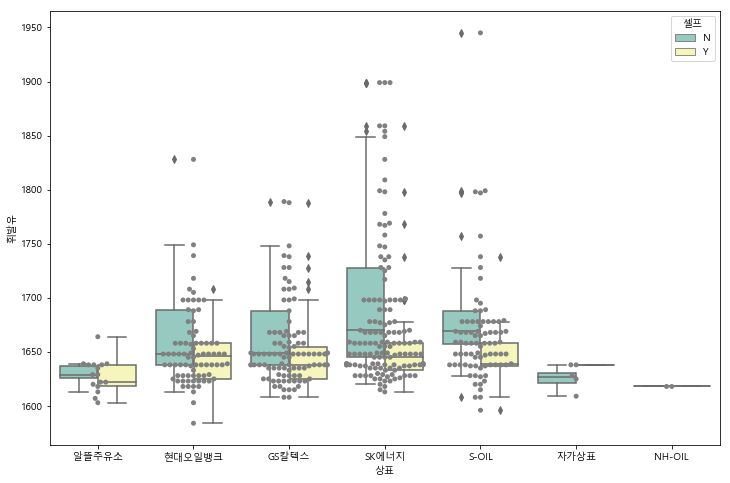

In [77]:
# 브랜드별 셀프 주유소의 가격 비교
plt.figure(figsize=(12,8))
sns.boxplot(x = '상표', y='휘발유', hue = '셀프',data = gas_stations2, palette='Set3')
#산점도 확인
sns.swarmplot(x='상표', y='휘발유', data = gas_stations2,color='.5')
plt.show()

### 지도 시각화 표시

- 부산 지도상에 주요가격 표시


In [78]:
import json
import folium

In [90]:
# 가격 오름차순
gas_station2.sort_values(by='휘발유', ascending=True).head(10)

,store,주소,휘발유,셀프,상표,자치구
263,북부산새마을금고주유소,부산 북구 금곡대로 37,1584.0,Y,현대오일뱅크,북구
282,(주)좋은기름나라새사상셀프주유소지점,부산 사상구 새벽로 154 (감전동),1596.0,Y,S-OIL,사상구
283,우리주유소,부산광역시 사상구 백양대로 701 (덕포동),1603.0,Y,알뜰주유소,사상구
284,아시안이엔에프(주)신라(친절한)주유소,부산 사상구 백양대로 671 (괘법동),1603.0,Y,현대오일뱅크,사상구
285,부영석유(주)도매주유소,부산광역시 사상구 가야대로 10 (감전동),1607.0,Y,알뜰주유소,사상구
287,좋은기름나라주유소,부산 사상구 백양대로 567 (감전동),1608.0,Y,S-OIL,사상구
286,아시아이엔에프(주)직영 아시아주유소,부산 사상구 백양대로 480 (주례동),1608.0,Y,GS칼텍스,사상구
25,(주)우양네트웍스 고려주유소,부산 서구 대영로 88 (동대신동1가),1608.0,N,S-OIL,서구
205,대양대박주유소,부산 동구 성남로 42 (좌천동),1608.0,N,GS칼텍스,동구
26,스타2 주유소,부산광역시 서구 원양로 260(암남동),1609.0,N,자가상표,서구


In [103]:
# 자치구별 평균 가격을 만들어서 gu_price df 생성
gu_pi_data=gas_station2.pivot_table(index = '자치구', values='휘발유')
#gu_price.rename(columns={'휘발유':'gu_price'}, inplace =True)
#gas_station3 = pd.merge(gas_station2,gu_price,on='자치구')
#gas_station3

In [101]:
busan_geo_path='./data/busan_area_gps.json'
busan_geo_str = json.load(open(busan_geo_path, encoding='utf-8'))

In [107]:
busan_geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '부산 기장',
   'properties': {'code': '21310',
    'name': '기장군',
    'name_eng': 'Gijang-gun',
    'base_year': '2013',
    'style': {'weight': 1,
     'opacity': 1,
     'color': 'black',
     'fillOpacity': 0.6,
     'fillColor': '#91003f'},
    'highlight': {}},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[129.2052495079534, 35.384810829415144],
      [129.21999816556436, 35.37561304214919],
      [129.26755198854022, 35.38341226661066],
      [129.2857909875702, 35.35965182306521],
      [129.2821380596251, 35.33844963971255],
      [129.30681468573164, 35.32644771030098],
      [129.2675569665142, 35.31604143854397],
      [129.26275266580004, 35.27831941566859],
      [129.24546065083584, 35.26120427164311],
      [129.25565431808167, 35.243593230216504],
      [129.23550974472084, 35.21139611410482],
      [129.22731336081907, 35.1832196018314],
      [129.2101963573097, 35.178863012450506],
     

In [108]:
map = folium.Map(location=[35.179755, 129.074984],zoom_start=10.4, tiles='Stamen Toner')
# 자치구별 영역 그리기 (주유소 휘발유값 기준)
map.choropleth(geo_data = busan_geo_str,
              data = gu_pi_data,
              columns=[gu_pi_data.index, '휘발유'],
              fill_color='PuRd',
                key_on='properties.name')
map

In [ ]:
# 표본은 가격 최상위, 최하위 10개씩만 지도에 마킹

In [109]:
# gas_station2.sort_values(by='휘발유', ascending=True).head(10)
# gas_station2.sort_values(by='휘발유', ascending=True).tail(10)

,store,주소,휘발유,셀프,상표,자치구
84,남항주유소,부산 영도구 남항서로 116 (남항동1가),1828.0,N,SK에너지,영도구
203,금융단지주유소,부산 남구 황령대로98번길 75 (문현동),1828.0,N,현대오일뱅크,남구
171,(주)SK정관주유소,부산 기장군 정관면 정관덕산길 21,1849.0,N,SK에너지,기장군
85,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),1854.0,N,SK에너지,영도구
373,괴정제일,부산 사하구 낙동대로 169 (괴정동),1859.0,N,SK에너지,사하구
281,만덕셀프주유소,부산광역시 북구 만덕대로 170,1859.0,Y,SK에너지,북구
238,동래,부산 동래구 중앙대로 1371 (온천동),1899.0,N,SK에너지,동래구
24,국제,부산 금정구 중앙대로 1756 (부곡동),1899.0,N,SK에너지,금정구
204,동해,부산 남구 수영로 179 (대연동),1899.0,N,SK에너지,남구
214,천일주유소,부산 동구 중앙대로 168 (초량동),1945.0,N,S-OIL,동구


In [113]:
import requests
def netGetGeocoder(query):    
    url = '''https://dapi.kakao.com/v2/local/search/address.json?query={0}&category_group_code=PO3
    '''.format(query)
    KAKAO_API_KEY = 'f9bcade751569c67742c3c82a2e2f2af'
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    }    
    #API 쿼리 수행
    res = requests.get(url, headers=headers)
    res = res.json()
    if not res['documents']:
        return 0,0
    # 데이터 추출 : 주소, 위도, 경도, 질의어 순으로 튜플 형태로 리턴
    return res['documents'][0]['y'],res['documents'][0]['x']

In [116]:
# #ERROR#
# addr_lat = []
# addr_lng = []
# for addr in tqdm_notebook(gas_station2['주소']):
#     tmp = netGetGeocoder(addr)
#     addr_lat.append(tmp[0])
#     addr_lng.append(tmp[1])
# gas_station2['lat']= addr_lat
# gas_station2['lng']= addr_lng

# #ndexError: list index out of range => 주소 값이 없어서 그럴수도 잇음. 함수내에서 예외 처리

In [114]:
addr_lat = []
addr_lng = []
for addr in tqdm_notebook(gas_station2['주소']):
    tmp = netGetGeocoder(addr)
    addr_lat.append(tmp[0])
    addr_lng.append(tmp[1])
gas_station2['lat']= addr_lat
gas_station2['lng']= addr_lng

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
gas_station2

,store,주소,휘발유,셀프,상표,자치구,lat,lng
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1613.0,N,알뜰주유소,금정구,35.26054361552982,129.09108415788532
1,청룡명품주유소,부산광역시 금정구 중앙대로2130,1613.0,N,현대오일뱅크,금정구,35.27455223614303,129.09288601040421
2,은마석유노포주유소,부산 금정구 중앙대로 2191 (노포동),1618.0,Y,GS칼텍스,금정구,35.2801855863629,129.09312771068056
3,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1620.0,N,SK에너지,금정구,35.26042595604724,129.09163486844983
4,지현주유소,부산광역시 금정구 중앙대로 2044(남산동),1620.0,Y,S-OIL,금정구,35.26658569388208,129.09312053868413
5,㈜천일에너지 천일주유소서동점,부산 금정구 반송로 364 (서동),1628.0,N,현대오일뱅크,금정구,35.2108905288345,129.10584060555914
6,금샘로주유소,부산 금정구 금샘로 460 (남산동),1638.0,Y,SK에너지,금정구,35.2640484245771,129.08517078166355
7,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1648.0,Y,현대오일뱅크,금정구,35.22227625679167,129.09010603978965
8,동양주유소,부산광역시 금정구 반송로 391 (서동),1648.0,Y,현대오일뱅크,금정구,35.21316207033728,129.1070456405901
9,신화주유소,부산 금정구 금강로 721,1648.0,Y,현대오일뱅크,금정구,35.27188538460765,129.08868576716762


In [118]:
# 표본은 가격 최상위, 최하위 10개씩만 지도에 마킹
gas_station2_high = gas_station2.sort_values(by = '휘발유', ascending = False)[:10]
gas_station2_high 

,store,주소,휘발유,셀프,상표,자치구,lat,lng
214,천일주유소,부산 동구 중앙대로 168 (초량동),1945.0,N,S-OIL,동구,35.11236303849652,129.03875916869
238,동래,부산 동래구 중앙대로 1371 (온천동),1899.0,N,SK에너지,동래구,35.20960768458388,129.07745289874893
24,국제,부산 금정구 중앙대로 1756 (부곡동),1899.0,N,SK에너지,금정구,35.24113091161727,129.09328761528587
204,동해,부산 남구 수영로 179 (대연동),1899.0,N,SK에너지,남구,35.13502418172014,129.0862711795275
373,괴정제일,부산 사하구 낙동대로 169 (괴정동),1859.0,N,SK에너지,사하구,35.10171858779152,128.9978379838968
281,만덕셀프주유소,부산광역시 북구 만덕대로 170,1859.0,Y,SK에너지,북구,35.213089964633326,129.0233990232746
85,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),1854.0,N,SK에너지,영도구,35.094930862708345,129.0477326264058
171,(주)SK정관주유소,부산 기장군 정관면 정관덕산길 21,1849.0,N,SK에너지,기장군,35.32320716127476,129.18251011698803
84,남항주유소,부산 영도구 남항서로 116 (남항동1가),1828.0,N,SK에너지,영도구,35.090711165295836,129.0373822822934
203,금융단지주유소,부산 남구 황령대로98번길 75 (문현동),1828.0,N,현대오일뱅크,남구,0,0


In [119]:
gas_station2_low = gas_station2.sort_values(by = '휘발유', ascending = True)[:10]
gas_station2_low

,store,주소,휘발유,셀프,상표,자치구,lat,lng
263,북부산새마을금고주유소,부산 북구 금곡대로 37,1584.0,Y,현대오일뱅크,북구,35.21351621232987,129.00384650156846
282,(주)좋은기름나라새사상셀프주유소지점,부산 사상구 새벽로 154 (감전동),1596.0,Y,S-OIL,사상구,35.15497001548498,128.98342200036973
283,우리주유소,부산광역시 사상구 백양대로 701 (덕포동),1603.0,Y,알뜰주유소,사상구,35.1694318382074,128.98827290334427
284,아시안이엔에프(주)신라(친절한)주유소,부산 사상구 백양대로 671 (괘법동),1603.0,Y,현대오일뱅크,사상구,35.166952509511276,128.98823008944103
285,부영석유(주)도매주유소,부산광역시 사상구 가야대로 10 (감전동),1607.0,Y,알뜰주유소,사상구,35.15164794668776,128.9738436530412
287,좋은기름나라주유소,부산 사상구 백양대로 567 (감전동),1608.0,Y,S-OIL,사상구,35.15826176996791,128.9923858743514
286,아시아이엔에프(주)직영 아시아주유소,부산 사상구 백양대로 480 (주례동),1608.0,Y,GS칼텍스,사상구,35.15304082986204,128.99968474985113
25,(주)우양네트웍스 고려주유소,부산 서구 대영로 88 (동대신동1가),1608.0,N,S-OIL,서구,35.110886999853925,129.02078510492962
205,대양대박주유소,부산 동구 성남로 42 (좌천동),1608.0,N,GS칼텍스,동구,35.13009300853815,129.0548478103251
26,스타2 주유소,부산광역시 서구 원양로 260(암남동),1609.0,N,자가상표,서구,35.07426962937447,129.00650366556118


In [123]:
map = folium.Map(location=[35.179755, 129.074984],zoom_start=11.4, tiles='Stamen Toner')
# 자치구별 영역 그리기 (주유소 휘발유값 기준)
map.choropleth(geo_data = busan_geo_str,
              data = gu_pi_data,
              columns=[gu_pi_data.index, '휘발유'],
              fill_color='PuRd',
                key_on='properties.name')

# 최저가 주요소 탑 10
for idx in gas_station2_low.index:
    folium.CircleMarker([float(gas_station2_low['lat'][idx]),
                        float(gas_station2_low['lng'][idx])],radius=20, color = '#00D8FF', fill=True).add_to(map)

# 최고가 주요소 탑 10
for idx in gas_station2_high.index:
    folium.CircleMarker([float(gas_station2_high['lat'][idx]),
                        float(gas_station2_high['lng'][idx])],radius=20, color = '#FF0000', fill=True).add_to(map)
#gas_station2_high
map